#  Loan Application Status Prediction


Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.



You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


As per the observation the the targrt varible is Loan_status it is having yes and no values so the problem is of classification

In [3]:
df.shape

(614, 13)

In [4]:
df.drop("Loan_ID", axis=1,inplace=True)

It is observe that there are 614 rows and 13 columns are there

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


It is shown that there are some rows having datatype are object and some are having float and int.

In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 The columns LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married and Dependents are heving null values.

In [7]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [11]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [12]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

<AxesSubplot:>

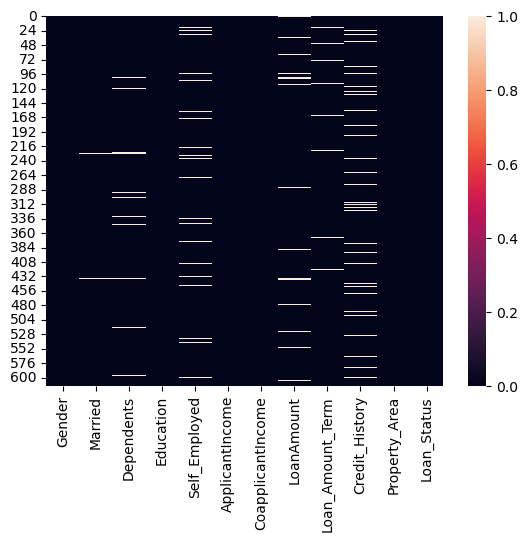

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

# Filling the missing values in Married by its mode Yes
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

# Filling the missing values in Dependents by its mode 0 
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

# Filling the missing values in Self_Employed by its mode No
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

# Filling the missing values in Credit_History  by its mode  No
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Filling the missing values in Loan_Amount_Term  by its mode 360 
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

In [16]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [17]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So, we have removed all the null values from dataset.

<AxesSubplot:>

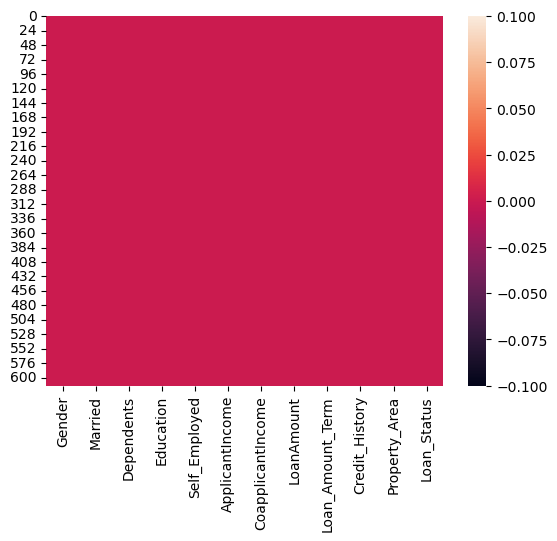

In [18]:
sns.heatmap(df.isnull())


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


we can see that difference between mean and 50% value in Applicantincome,Coapplicationcome and LoanAmount is greater

# Data visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


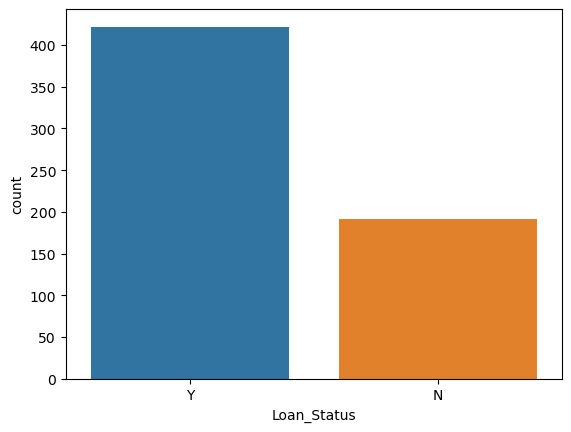

In [20]:
print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'])
plt.show()

Count of the loan approved is geateer than the loan decined

Male      502
Female    112
Name: Gender, dtype: int64


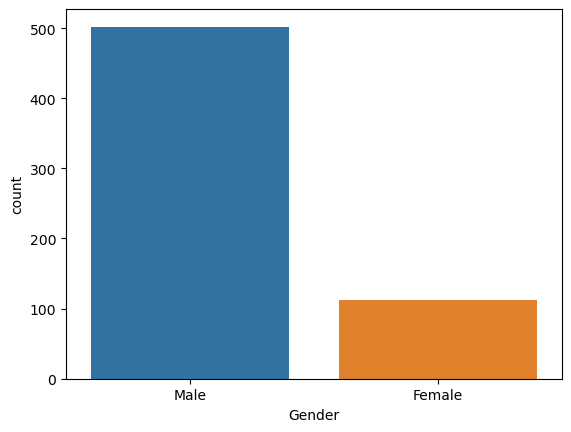

In [21]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])
plt.show()

The count of male for applying to loan greater than the Female

Yes    401
No     213
Name: Married, dtype: int64


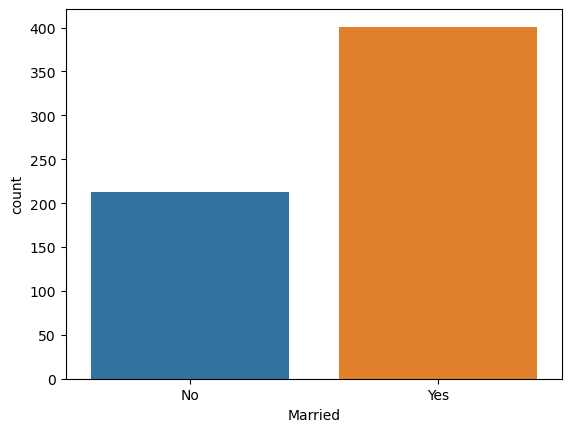

In [22]:
print(df['Married'].value_counts())
sns.countplot(df['Married'])
plt.show()

Applying loan who are married having count is greater than the unmarried

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


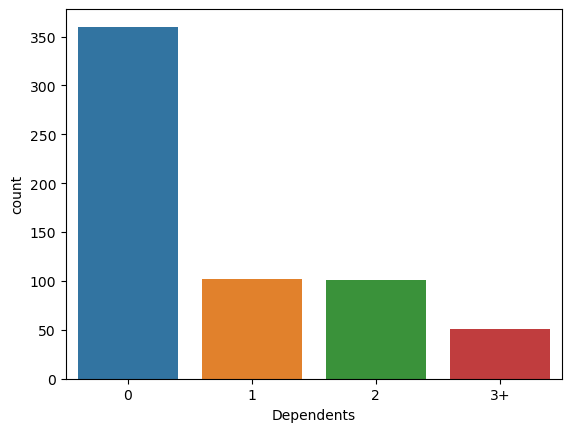

In [23]:
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])
plt.show()

Applients having '0' depents having high count 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


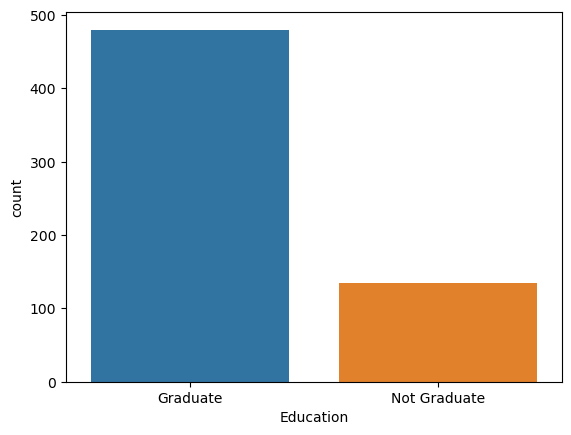

In [24]:
print(df['Education'].value_counts())
sns.countplot(df['Education'])
plt.show()

The applicent applaying for loan having graduate count is greater than the Not graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64


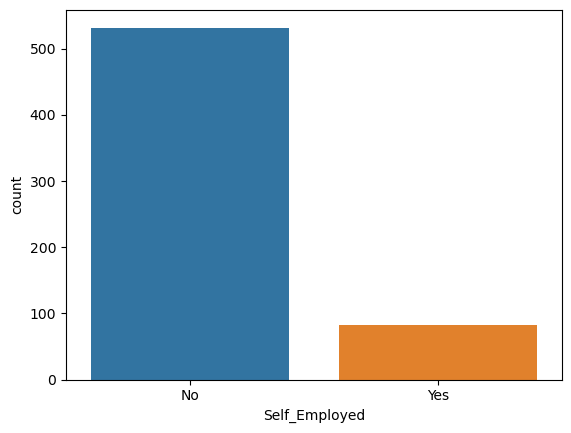

In [25]:
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])
plt.show()

Count of applying loan peoples having self emplyed is very less.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


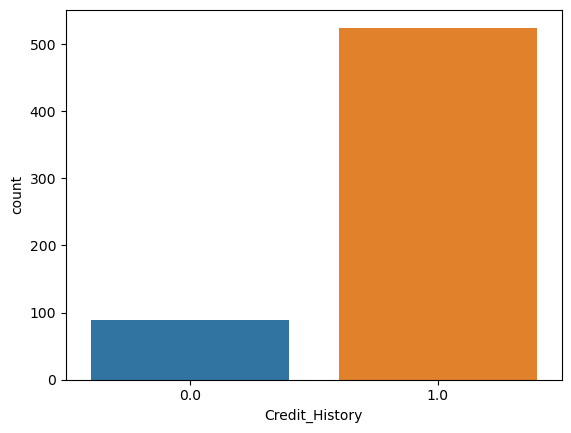

In [26]:
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'])
plt.show()

Most of the applicant having credit history 1 

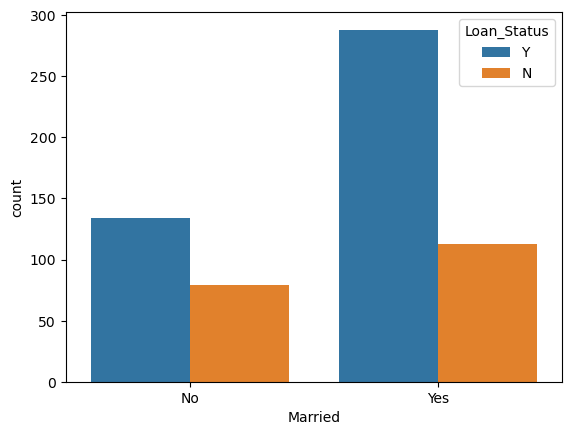

In [27]:
sns.countplot(df['Married'],hue=df['Loan_Status'])
plt.show()

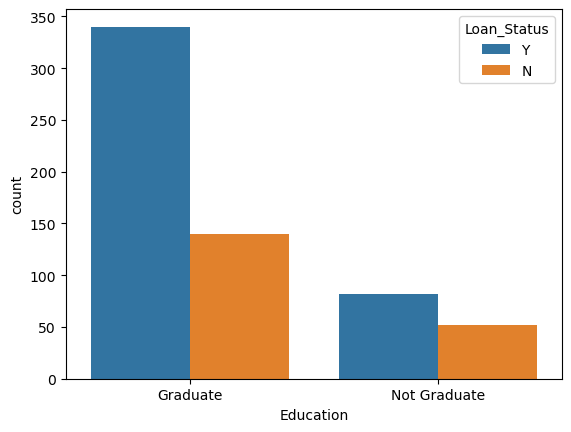

In [28]:
sns.countplot(df['Education'],hue=df['Loan_Status'])
plt.show()

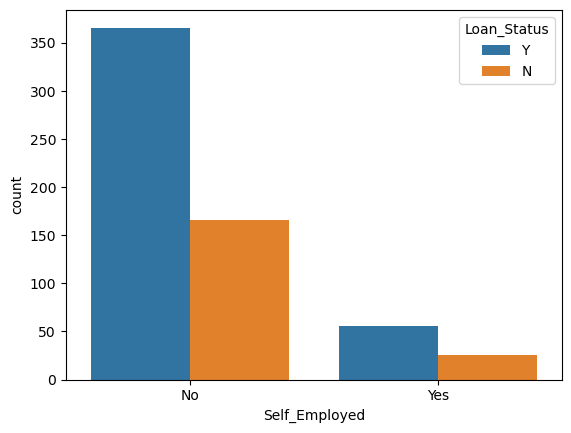

In [29]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
plt.show()

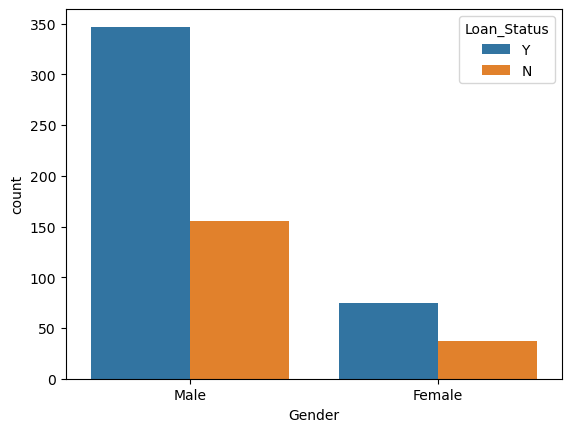

In [30]:
sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.show()

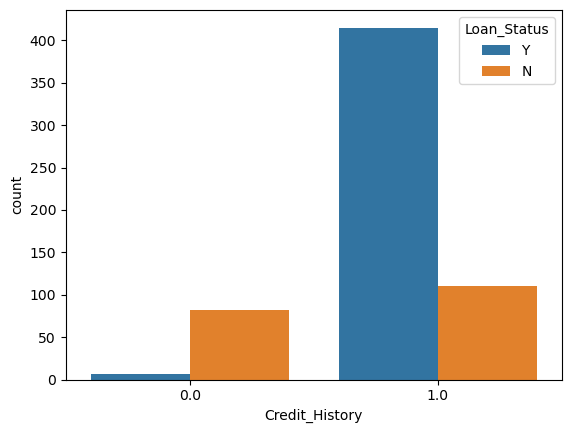

In [31]:
sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
plt.show()

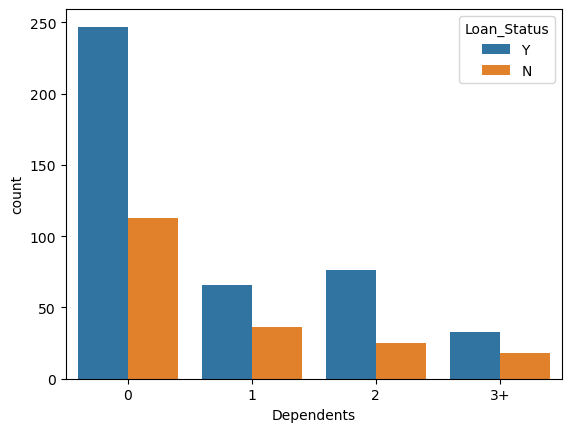

In [32]:
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.show()

# Multivariate Analysis

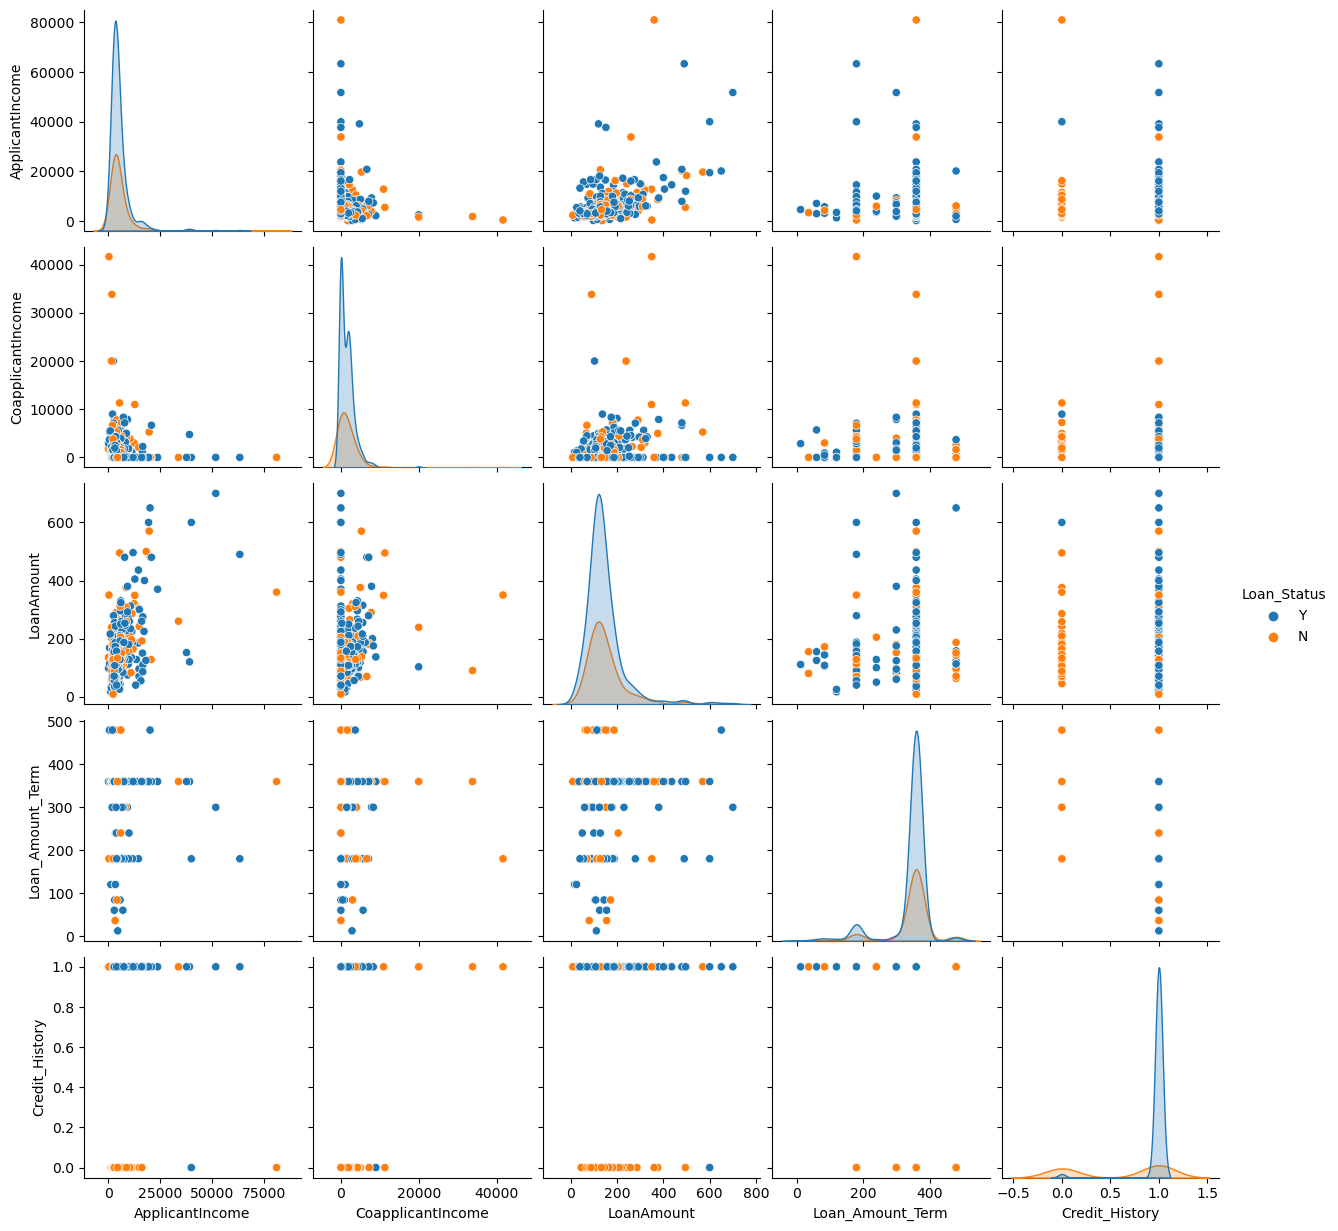

In [33]:
sns.pairplot(df,hue="Loan_Status")

# Checking skewness

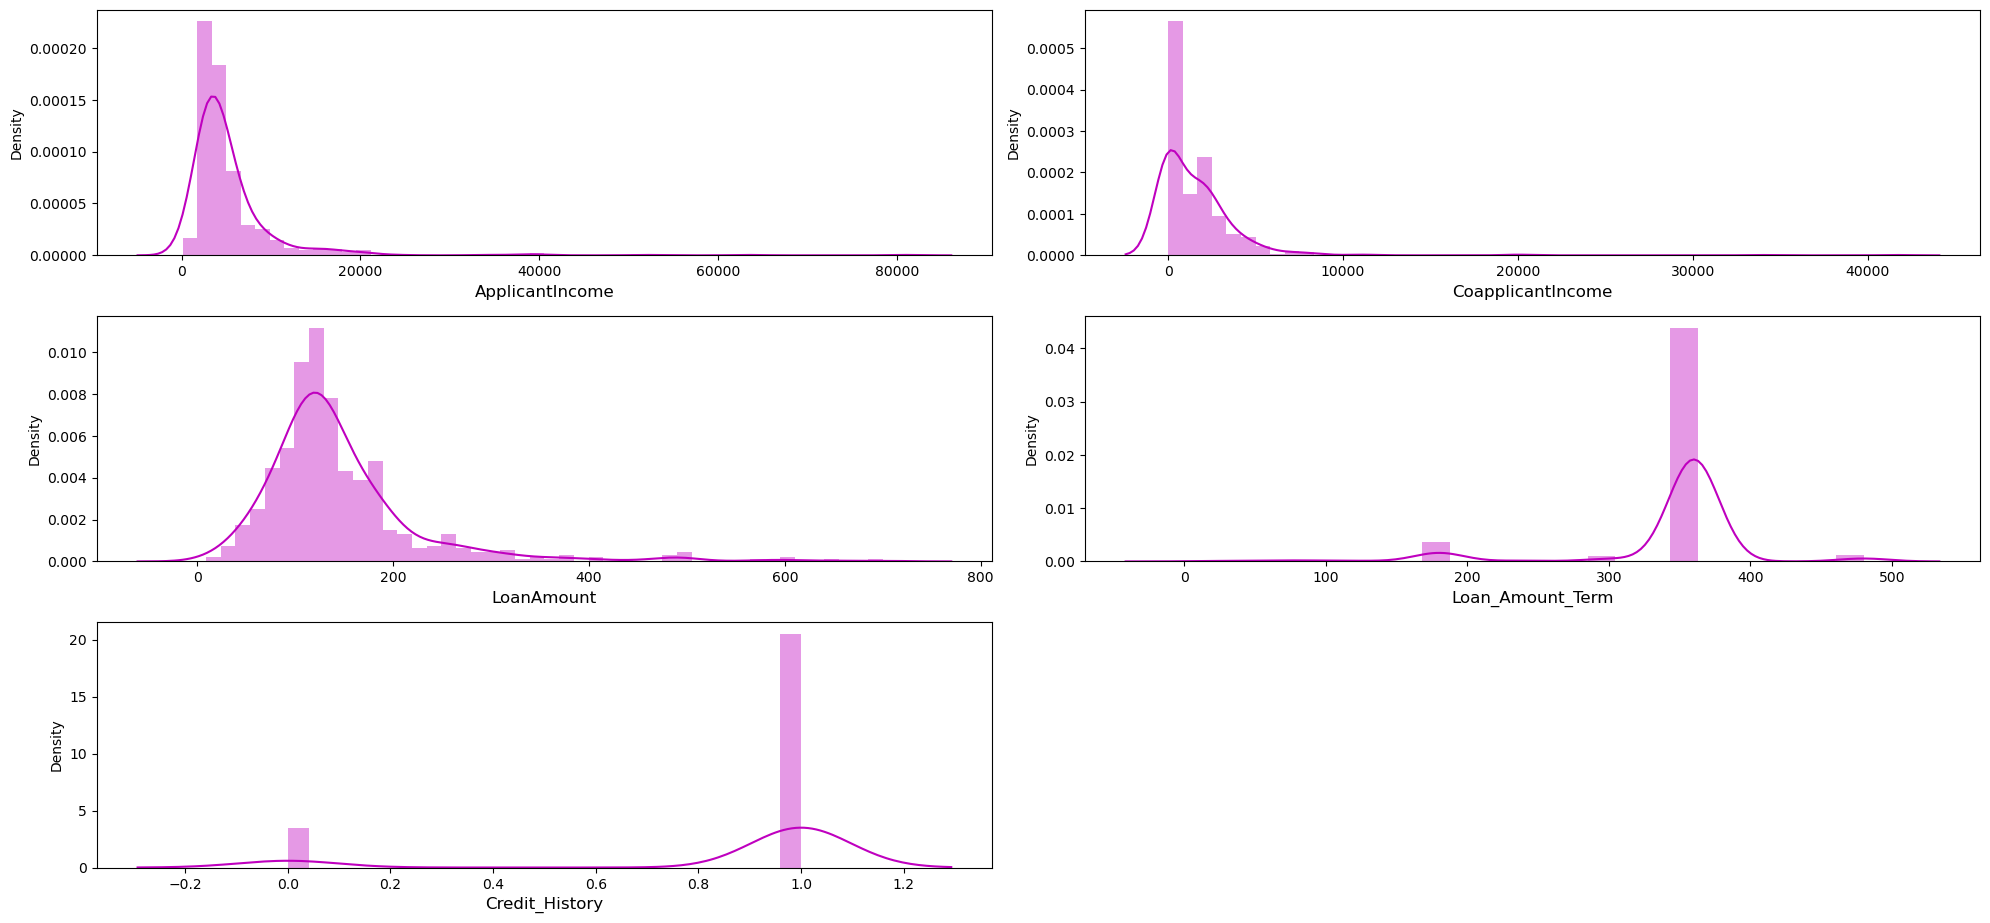

In [34]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumer =1
for col in numerical_col:
    if plotnumer<=5:
        ax =plt.subplot(5,2,plotnumer)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation =0,fontsize =10)
    plotnumer+=1
plt.tight_layout()    

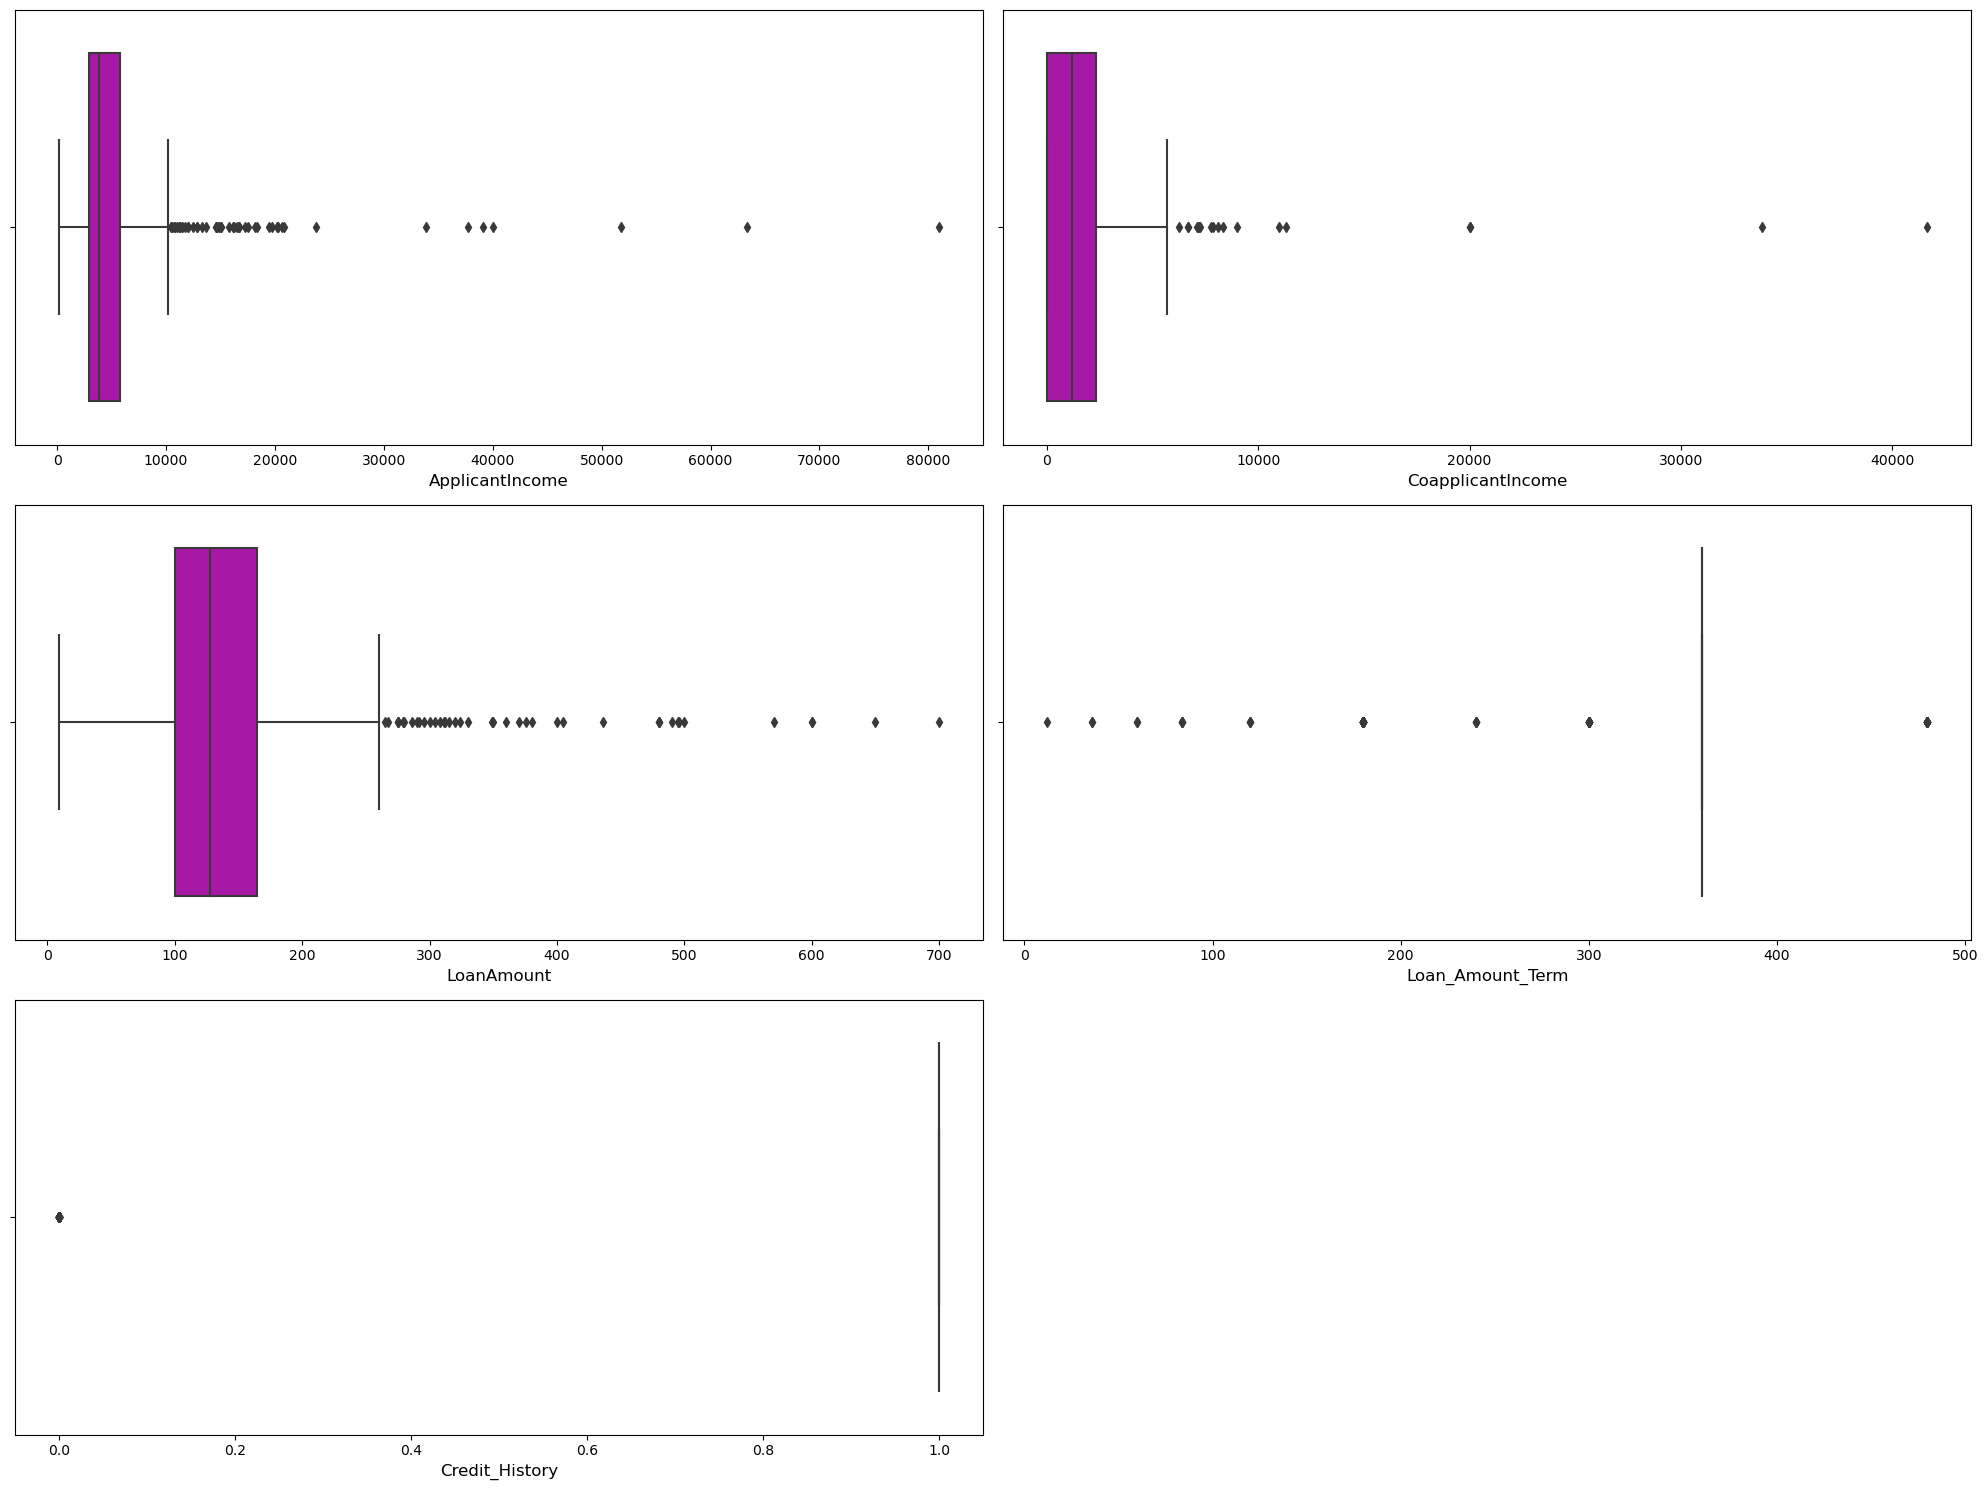

In [35]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumer =1
for col in numerical_col:
    if plotnumer<=5:
        ax =plt.subplot(3,2,plotnumer)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation =0,fontsize =10)
    plotnumer+=1
plt.tight_layout()    

# Removing Outliers

In [36]:
features = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]

#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,0.554487,0.211241,0.273231
1,0.134412,0.038732,0.211241,0.273231
2,0.393747,0.554487,0.948996,0.273231
3,0.462062,0.251980,0.306435,0.273231
4,0.097728,0.554487,0.056551,0.273231
...,...,...,...,...
609,0.410130,0.554487,0.889500,0.273231
610,0.212557,0.554487,1.258378,2.522836
611,0.437174,0.472404,1.276168,0.273231
612,0.357064,0.554487,0.490816,0.273231


In [37]:
df1 = df[(z<3).all(axis=1)]
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
df1.shape

(577, 12)

# Checking the skewness 

In [39]:
df1.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

Above all columns having skewness we will remove the skewness from only numerical columns

# Removing the Skewness

In [40]:
skew = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')


In [41]:
df1[skew] = scaler.fit_transform(df1[skew].values)

In [42]:
df1.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

# Encoding the columns using Label Encoders

In [43]:
categorical_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1[categorical_col]= df1[categorical_col].apply(LE.fit_transform)

In [44]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.587375,-1.122446,-1.293791,360.0,1.0,0,1
610,1,1,3,0,0,0.035386,-1.122446,-2.332692,180.0,1.0,0,1
611,1,1,1,0,0,1.281658,0.173344,1.845015,360.0,1.0,2,1
612,1,1,2,0,0,1.164426,-1.122446,0.976055,360.0,1.0,2,1


In [45]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

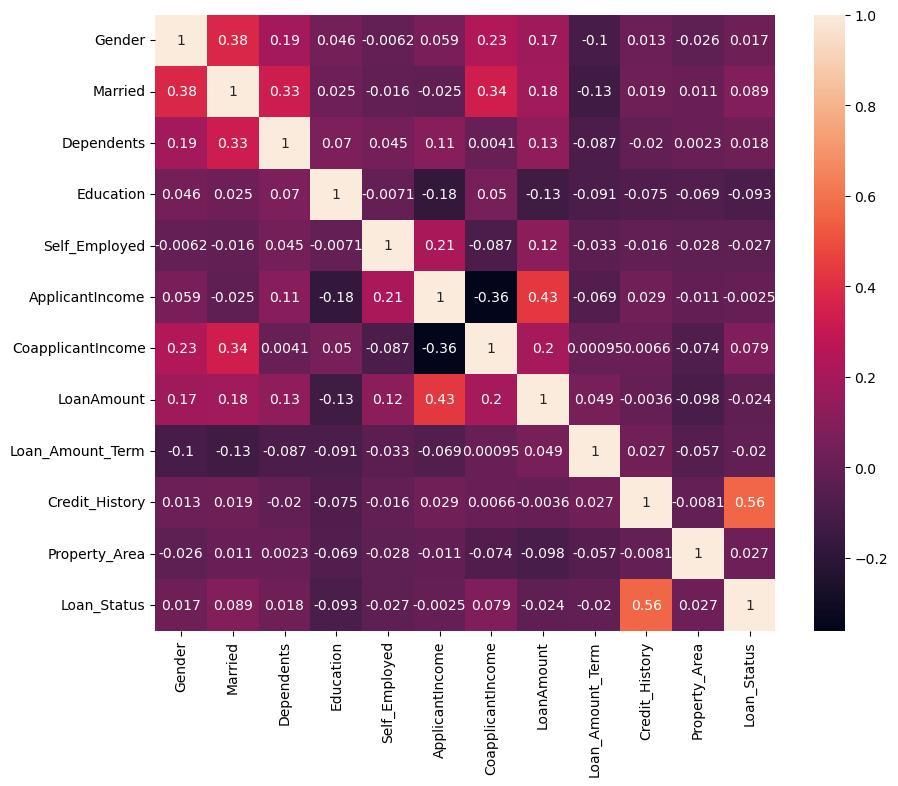

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)

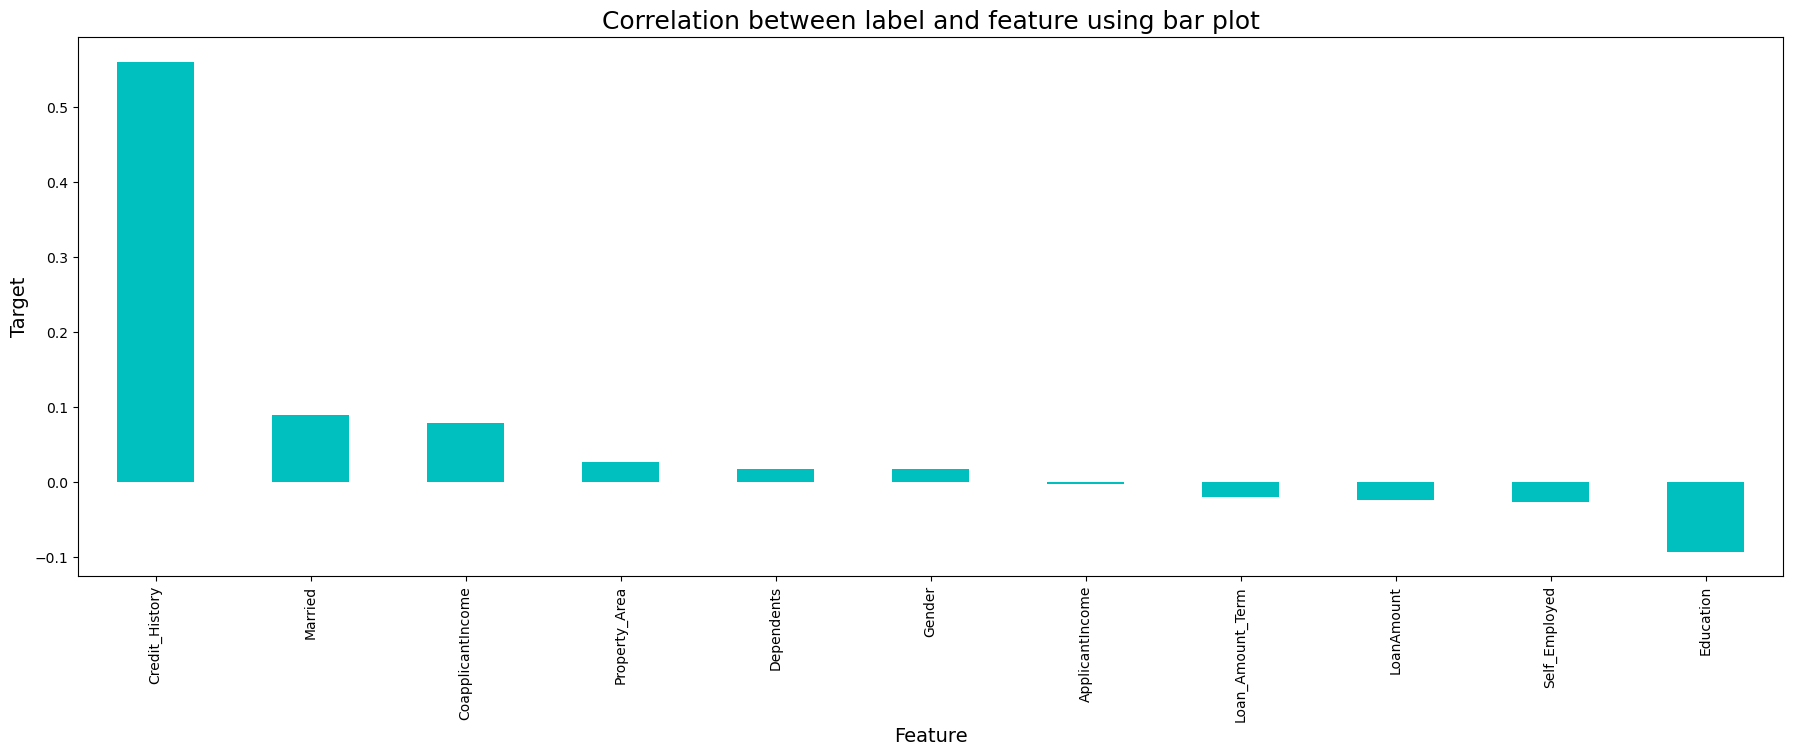

In [47]:
plt.figure(figsize=(22,7))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title("Correlation between label and feature using bar plot", fontsize=18)
plt.show()

# Dividing Features and columns

In [48]:
x = df1.drop("Loan_Status", axis=1)
y = df1["Loan_Status"]

# Features Scalinng

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [50]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

# Oversampling

In [51]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [52]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8828451882845189  on Random_state  29


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# DecisionTreeClassifier

In [57]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

# prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.7782426778242678
[[98 28]
 [25 88]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       126
           1       0.76      0.78      0.77       113

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



# RandomForestClassifier

In [58]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8535564853556485
[[105  21]
 [ 14  99]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       126
           1       0.82      0.88      0.85       113

    accuracy                           0.85       239
   macro avg       0.85      0.85      0.85       239
weighted avg       0.86      0.85      0.85       239



# Logistic Regression

In [60]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

# prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.702928870292887
[[ 67  59]
 [ 12 101]]
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       126
           1       0.63      0.89      0.74       113

    accuracy                           0.70       239
   macro avg       0.74      0.71      0.70       239
weighted avg       0.75      0.70      0.69       239



# Support Vector Classifier

In [61]:
svc = SVC()
svc.fit(x_train,y_train)

# prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7824267782426778
[[ 85  41]
 [ 11 102]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       126
           1       0.71      0.90      0.80       113

    accuracy                           0.78       239
   macro avg       0.80      0.79      0.78       239
weighted avg       0.80      0.78      0.78       239



# KNeighbors Classifier

In [62]:
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7866108786610879
[[99 27]
 [24 89]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       126
           1       0.77      0.79      0.78       113

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



# Gradient Boosting Classifier

In [63]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.803347280334728
[[94 32]
 [15 98]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       126
           1       0.75      0.87      0.81       113

    accuracy                           0.80       239
   macro avg       0.81      0.81      0.80       239
weighted avg       0.81      0.80      0.80       239



# AdaBoost Classifier

In [64]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test, predABC))

0.7866108786610879
[[97 29]
 [22 91]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       126
           1       0.76      0.81      0.78       113

    accuracy                           0.79       239
   macro avg       0.79      0.79      0.79       239
weighted avg       0.79      0.79      0.79       239



# Checking Cross validation scrore

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
print(cross_val_score(DTC ,x,y,cv=5).mean())

0.7978459119496856


In [67]:
print(cross_val_score(RFC ,x,y,cv=5).mean())

0.841808176100629


In [68]:
print(cross_val_score(LR ,x,y,cv=5).mean())

0.7274056603773584


In [69]:
print(cross_val_score(svc ,x,y,cv=5).mean())

0.7349685534591195


In [70]:
print(cross_val_score(knn ,x,y,cv=5).mean())

0.7701100628930817


In [71]:
print(cross_val_score(GB ,x,y,cv=5).mean())

0.7827830188679246


In [72]:
print(cross_val_score(GB ,x,y,cv=5).mean())

0.7827830188679246


# Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance'],
             'p':[1,2,3,4,5]}

In [75]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [77]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

In [78]:
Loan = KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Loan.fit(x_train,y_train)
pred = Loan.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

81.17154811715481


Accuracy of best model increased to 81% 

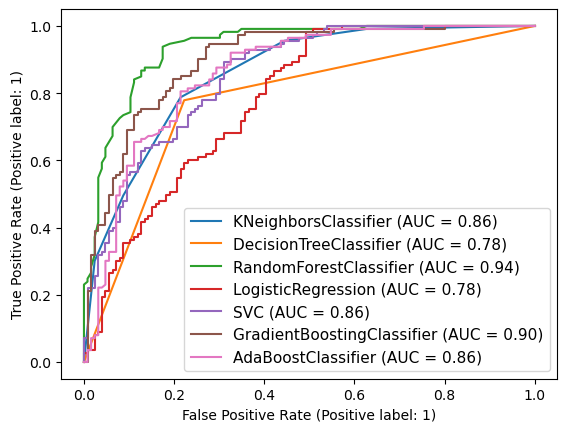

In [80]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(DTC , x_test, y_test, ax=disp.ax_)      
plot_roc_curve(RFC , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(LR , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(svc , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(GB , x_test, y_test, ax=disp.ax_) 
plot_roc_curve(ABC , x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

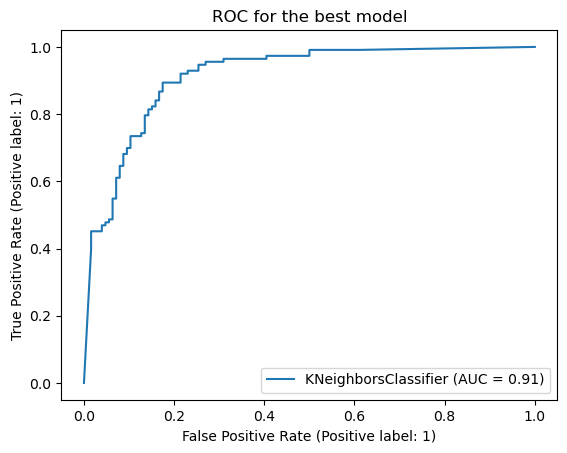

In [81]:
plot_roc_curve(Loan, x_test, y_test)
plt.title("ROC for the best model")
plt.show()


In [82]:
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']